# 3
Обучить линейный SVM для задачи бинарной классификации luminal A vs luminal B на 50 генах. Отобрать 5 наиболее важных генов (наибольшие модули коэффициентов), обучить на них SVM. Как изменится качество классификации (TPR, TNR, ROC AUC)?

0.9194630872483222
[[97  6]
 [ 6 40]]
0.941747572815534 0.8695652173913043
Index(['BIRC5', 'ACTR3B', 'UBE2C', 'UBE2T', 'RRM2', 'SLC39A6', 'TYMS', 'MELK',
       'CENPF', 'PTTG1', 'MYBL2', 'BLVRA', 'CDC6', 'CDC20', 'NUF2', 'ORC6',
       'KRT5', 'CCNE1', 'MLPH', 'ANLN', 'EXO1', 'CDH3', 'CEP55', 'CCNB1',
       'FOXA1', 'PGR', 'GPR160', 'KIF2C', 'MKI67', 'ESR1', 'TMEM45B', 'GRB7',
       'NAT1', 'ERBB2', 'MMP11', 'MYC', 'EGFR', 'MAPT', 'NDC80', 'KRT14',
       'SFRP1', 'PHGDH', 'FGFR4', 'BCL2', 'MDM2', 'FOXC1', 'CXXC5', 'KRT17',
       'MIA', 'BAG1'],
      dtype='object')


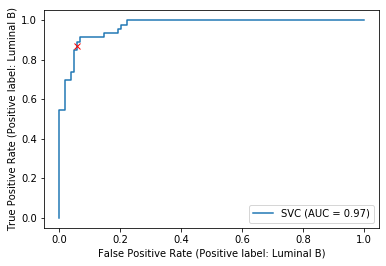

In [25]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"])]
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

df=df.T.iloc[:-1,:]
df['coef']=model.coef_[0]
df=df.sort_values('coef',ascending=False)
print(df.index)

BIRC5    1.304432  
ACTR3B   1.033695  
UBE2C    0.919158  
UBE2T    0.676708  
RRM2     0.603184 

0.8389261744966443
[[94  9]
 [15 31]]
0.912621359223301 0.6739130434782609


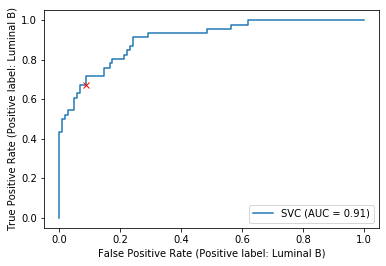

In [31]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[df["Subtype"].isin(["Luminal A", "Luminal B"]),['BIRC5','ACTR3B','UBE2C','UBE2T','RRM2','Subtype']]
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

# 4
Обучить линейный SVM для многоклассовой задачи (BRCApam50), используя: 1) 50 генов; 2) первые 2 главные компоненты. Сравнить качество классификации.

In [48]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)

0.9126637554585153
[[15  0  0  1  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 98  5  0  0]
 [ 0  0  9 37  0  0]
 [ 0  1  3  0  0  1]
 [ 0  0  0  0  0 34]]


In [54]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''
from sklearn.decomposition import PCA

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

pca = PCA(n_components=2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)

0.8253275109170306
[[ 8  0  0  8  0  0]
 [ 0 20  4  0  1  0]
 [ 1  0 96  6  0  0]
 [ 1  0 14 31  0  0]
 [ 1  0  3  0  1  0]
 [ 1  0  0  0  0 33]]


# 5
Сгенерировать два датасета:
1) Две выборки из двумерного нормального распределения сцентрами в (0, 0) и (10, 10) по 10000 точек (ожидается идеальная линейная разделимость);
2) две выборки из двумерного нормального распределения сцентрами в (0, 0) и (0, 0) по 10000 точек (ожидается полное отсутствие разделимости).
Обучить линейный SVM в обоих случаях. Зависит ли скорость обучения SVM от качества результирующего классификатора?

--- 0.02898097038269043 seconds ---
1.0
[[2500    0]
 [   0 2500]]
1.0 1.0


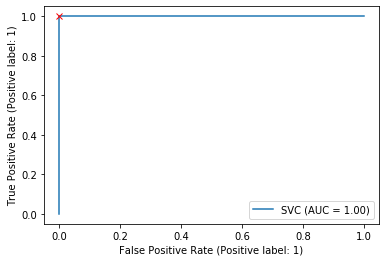

In [43]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''

# TPR, TNR
np.random.seed(17)

N = 10000
sample1_X1 = np.random.normal(loc=0, size=(N, 1))
sample1_X2 = np.random.normal(loc=0, size=(N, 1))
sample2_X1 = np.random.normal(loc=10, size=(N, 1))
sample2_X2 = np.random.normal(loc=10, size=(N, 1))

X1=[]
for i in sample1_X1:
    X1.append(float(i))
for i in sample2_X1:
    X1.append(float(i))
X2=[]
for i in sample1_X2:
    X2.append(float(i))
for i in sample2_X2:
    X2.append(float(i))
    
X = pd.DataFrame({
    'X1': X1,
    'X2': X2
})

X = X.to_numpy()
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

import time
start_time = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")

--- 31.09788465499878 seconds ---
0.4934
[[1271 1229]
 [1304 1196]]
0.5084 0.4784


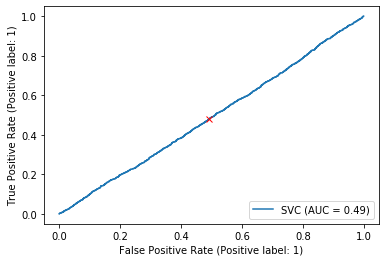

In [44]:
'''
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
'''

# TPR, TNR
np.random.seed(17)

N = 10000
sample1_X1 = np.random.normal(loc=0, size=(N, 1))
sample1_X2 = np.random.normal(loc=0, size=(N, 1))
sample2_X1 = np.random.normal(loc=0, size=(N, 1))
sample2_X2 = np.random.normal(loc=0, size=(N, 1))

X1=[]
for i in sample1_X1:
    X1.append(float(i))
for i in sample2_X1:
    X1.append(float(i))
X2=[]
for i in sample1_X2:
    X2.append(float(i))
for i in sample2_X2:
    X2.append(float(i))
    
X = pd.DataFrame({
    'X1': X1,
    'X2': X2
})

X = X.to_numpy()
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

import time
start_time = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

print(accuracy_score(y_test, y_pred))
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="red")